# Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, r2_score
import warnings
warnings.filterwarnings('ignore')

import pickle


# Data Collection

In [2]:
ds = pd.read_csv("disease.csv")

In [3]:
ds

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
ds.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


# Handling Null Values

In [6]:
ds.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

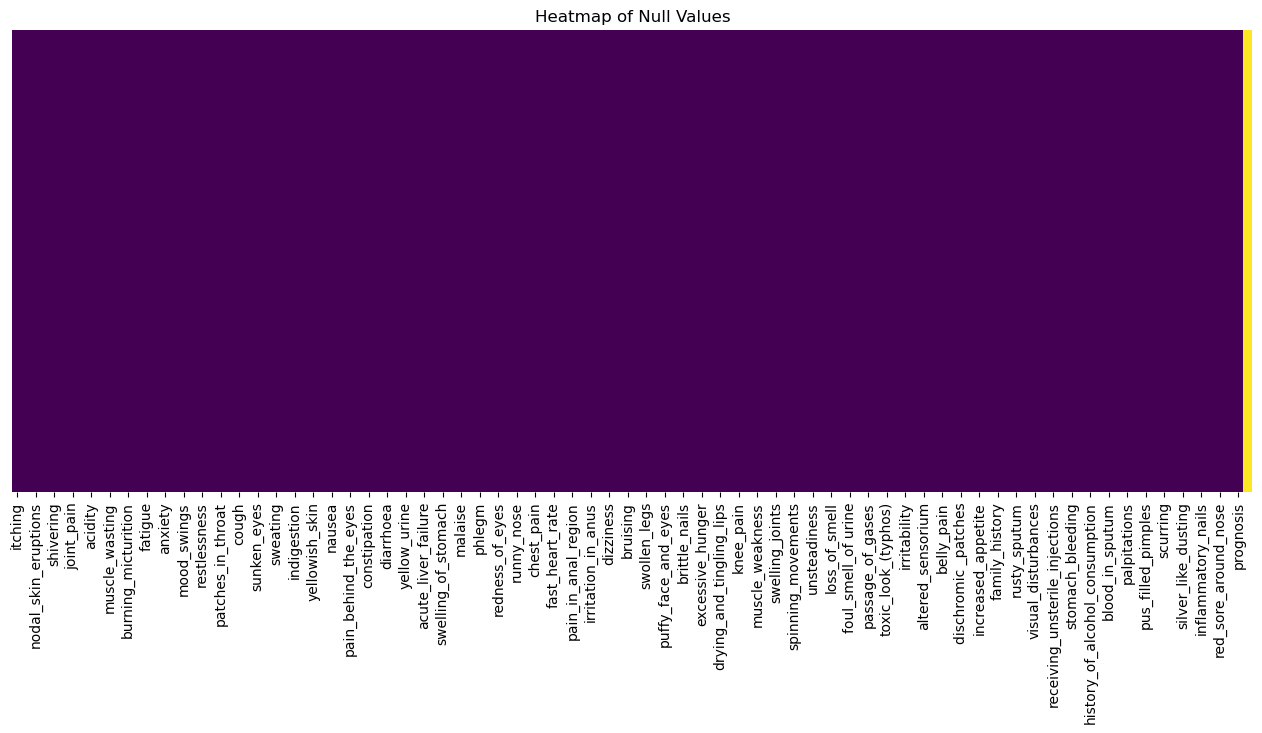

In [7]:
plt.figure(figsize=(16, 6))
sns.heatmap(ds.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap of Null Values')
plt.show()

In [8]:
ds.drop("Unnamed: 133", inplace = True, axis = 1)

In [9]:
ds

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [10]:
ds.shape

(4920, 133)

In [11]:
cols = list(ds.columns)
cols

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [12]:
unique_ds = ds["prognosis"].unique()

In [13]:
for i in unique_ds:
    print(i)

Fungal infection
Allergy
GERD
Chronic cholestasis
Drug Reaction
Peptic ulcer diseae
AIDS
Diabetes 
Gastroenteritis
Bronchial Asthma
Hypertension 
Migraine
Cervical spondylosis
Paralysis (brain hemorrhage)
Jaundice
Malaria
Chicken pox
Dengue
Typhoid
hepatitis A
Hepatitis B
Hepatitis C
Hepatitis D
Hepatitis E
Alcoholic hepatitis
Tuberculosis
Common Cold
Pneumonia
Dimorphic hemmorhoids(piles)
Heart attack
Varicose veins
Hypothyroidism
Hyperthyroidism
Hypoglycemia
Osteoarthristis
Arthritis
(vertigo) Paroymsal  Positional Vertigo
Acne
Urinary tract infection
Psoriasis
Impetigo


In [14]:
ds["prognosis"].count()

4920

# Exploratory Data Analysis

Text(0.5, 1.0, 'Percentage of Smoking Status')

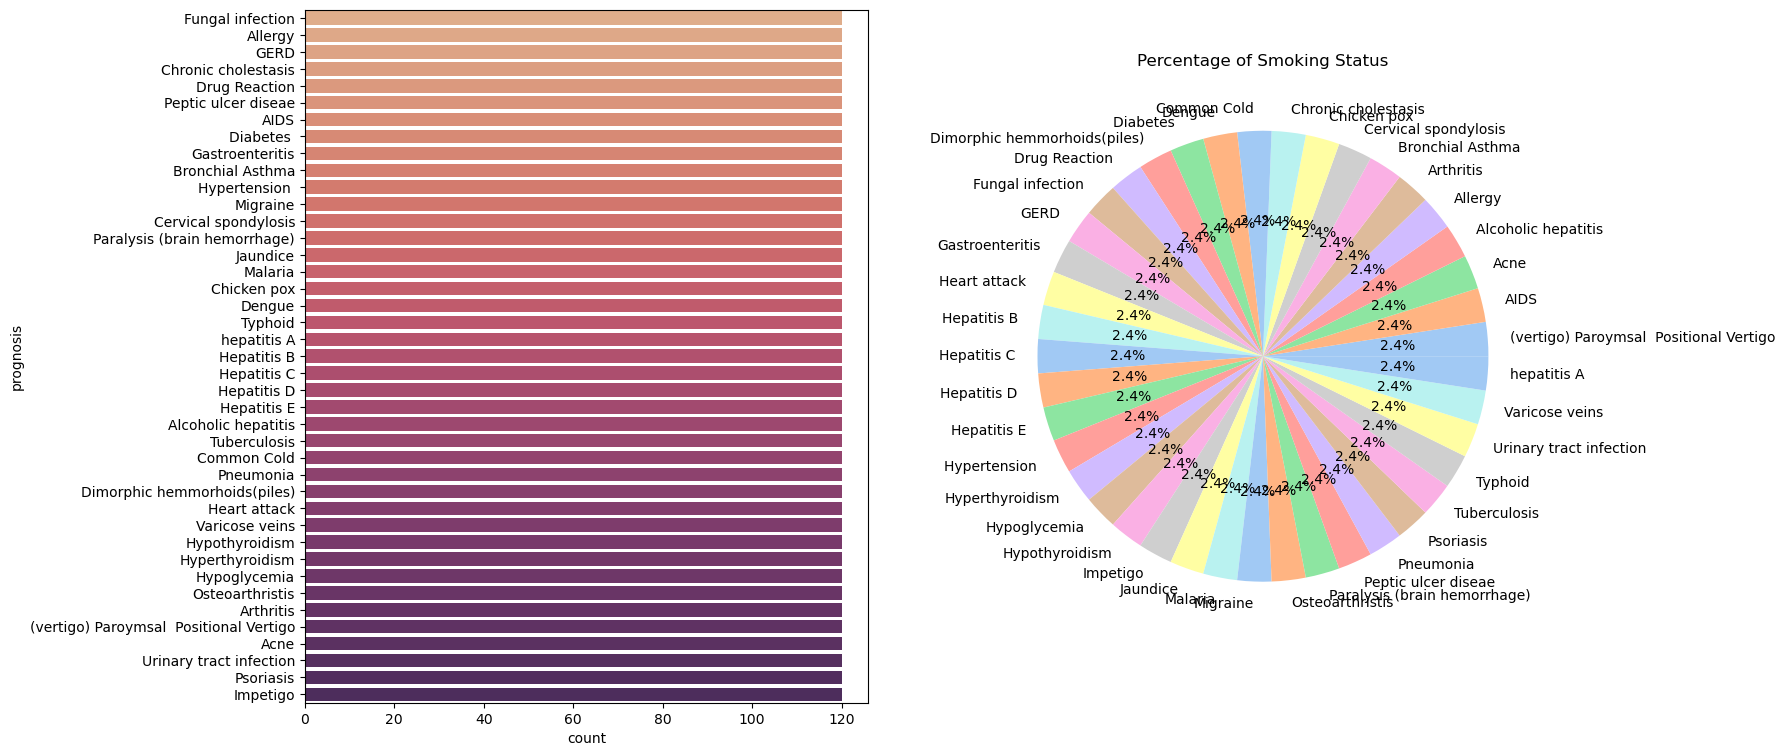

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
sns.countplot(y ='prognosis', data = ds, palette='flare', ax=axes[0])
plt.title('Count of Stroke Patients')

prognosis = ds.groupby('prognosis')['prognosis'].count()
colors = sns.color_palette('pastel')
plt.pie(prognosis, labels=prognosis.index, autopct="%.1f%%", colors=colors)
plt.title("Percentage of Smoking Status")

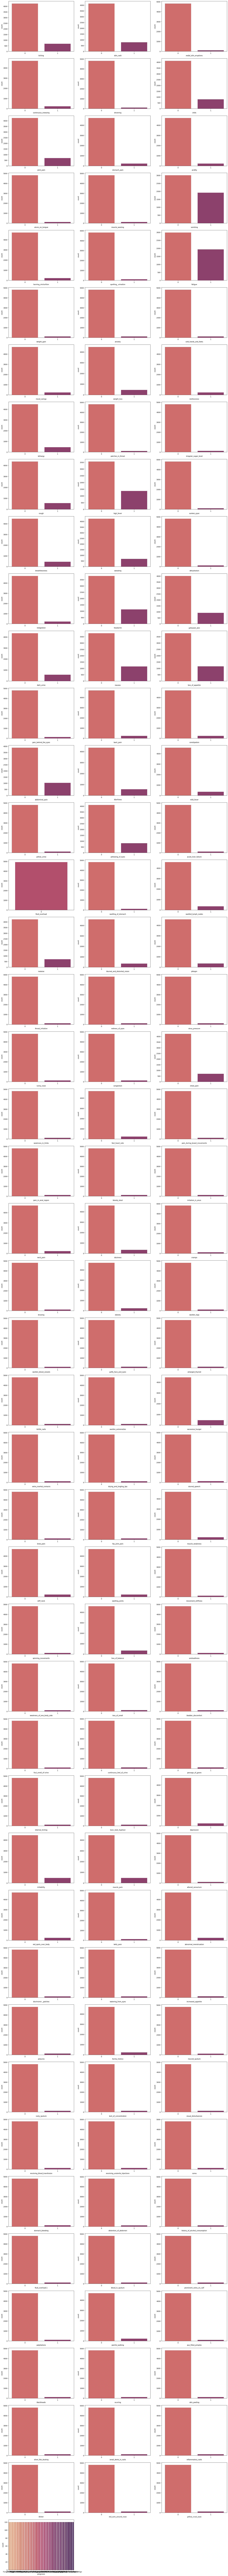

In [16]:
num_columns = len(ds.columns)
num_rows = (num_columns // 3) + (num_columns % 3 != 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))

for i, column in enumerate(ds.columns):
    ax = axes[i // 3, i % 3]
    sns.countplot(data=ds, x=column, ax=ax, palette='flare')
    ax.set_xlabel(column)

if num_columns % 3 != 0:
    for j in range(num_columns % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

In [17]:
x = ds.drop(['prognosis'], axis = 1)

In [18]:
label_encoder = LabelEncoder()

In [19]:
ds['prognosis'] = label_encoder.fit_transform(ds['prognosis'])

In [20]:
uniq = ds["prognosis"].unique()
for o in uniq:
    print(o)

15
4
16
9
14
33
1
12
17
6
23
30
7
32
28
29
8
11
37
40
19
20
21
22
3
36
10
34
13
18
39
26
24
25
31
5
0
2
38
35
27


In [21]:
y = ds['prognosis']

# Data Modelling

# Random forest classifier with GridSearchCV 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [23]:
base_estimator = RandomForestClassifier()

In [24]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
grid_search = GridSearchCV(estimator = base_estimator, param_grid = param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 9 folds for each of 108 candidates, totalling 972 fits


GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [26]:
best_model = grid_search.best_estimator_

In [27]:
cv_scores = cross_val_score(best_model, x, y, cv=9)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 1.00 ± 0.00


In [28]:
best_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [29]:
y_pred_cv = best_model.predict(x_test)

In [30]:
acc_cv = metrics.accuracy_score(y_test, y_pred_cv)
print('Accuracy: {:.2f}%'. format(acc_cv * 100))

Accuracy: 100.00%


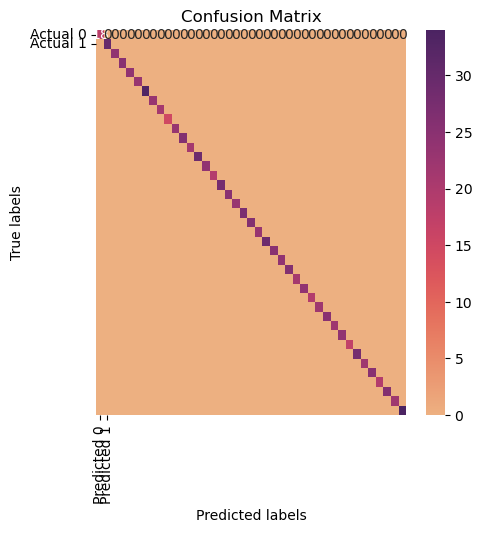

In [31]:
cm = confusion_matrix(y_test, y_pred_cv)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
RF = {'actual':y_test, 'prediction':y_pred_cv}
pd.DataFrame(data = RF)

,actual,prediction
373,2,2
4916,2,2
1550,24,24
3081,1,1
3857,9,9
...,...,...
1101,13,13
4639,1,1
3625,11,11
378,2,2


# AdaBoost Classifier

In [33]:
adaboost = AdaBoostClassifier(base_estimator = best_model, n_estimators=50, random_state=42)

In [34]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                   random_state=42)

In [35]:
y_pred_ada = adaboost.predict(x_test)

In [36]:
acc_ada = metrics.accuracy_score(y_test, y_pred_ada)
print('Accuracy: {:.2f}%'. format(acc_ada * 100))

Accuracy: 100.00%


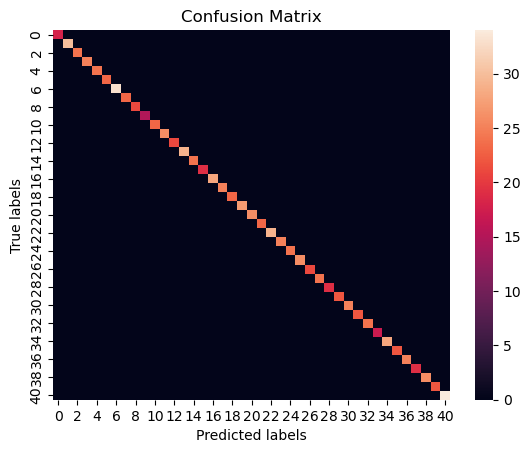

In [74]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(metrics.classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

In [38]:
pickle.dump(adaboost, open('model1.pkl','wb'))

In [39]:
dub_data = pd.read_csv("disease.csv")

In [40]:
unik = ds["prognosis"].unique()
unique_ds_sorted = sorted(unik)
unique_ds_sorted

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [41]:
uniqu = dub_data["prognosis"].unique()
unique_dub_sorted = sorted(uniqu)
unique_dub_sorted

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

In [42]:
compare = {'encoded':unique_ds_sorted, 'actual':unique_dub_sorted}
pd.DataFrame(data = compare)

,encoded,actual
0,0,(vertigo) Paroymsal Positional Vertigo
1,1,AIDS
2,2,Acne
3,3,Alcoholic hepatitis
4,4,Allergy
5,5,Arthritis
6,6,Bronchial Asthma
7,7,Cervical spondylosis
8,8,Chicken pox
9,9,Chronic cholestasis


# SVM - Support Vector Machine

In [43]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [44]:
svc = SVC(kernel='linear', decision_function_shape='ovr')

In [45]:
svc.fit(x2_train, y2_train)

SVC(kernel='linear')

In [46]:
y_pred_svc = svc.predict(x2_test)

In [47]:
acc_svc = metrics.accuracy_score(y2_test, y_pred_svc)
print('Accuracy: {:.2f}%'. format(acc_svc * 100))

Accuracy: 100.00%


In [48]:
clfr = classification_report(y2_test, y_pred_svc)
print(clfr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17       1.00    

In [70]:
cm_svm = confusion_matrix(y2_test, y_pred_svc)

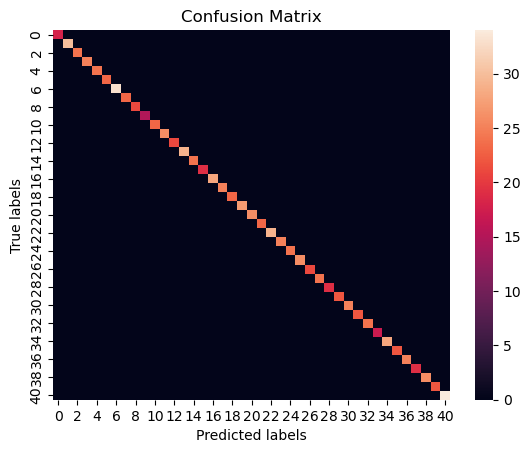

In [72]:
sns.heatmap(cm_svm)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
pickle.dump(svc, open('model2.pkl','wb'))

In [50]:
svcm = {'actual':y2_test, 'prediction':y_pred_svc}
pd.DataFrame(data = svcm)

,actual,prediction
373,2,2
4916,2,2
1550,24,24
3081,1,1
3857,9,9
...,...,...
1101,13,13
4639,1,1
3625,11,11
378,2,2


# KNN

In [51]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, train_size=0.8, random_state = 42)

In [52]:
knn = KNeighborsClassifier()

In [53]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [54]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [55]:
grid_search_knn.fit(x3_train, y3_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [56]:
best_knn_model = grid_search_knn.best_estimator_

In [57]:
best_knn_model.fit(x3_train, y3_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [58]:
y_pred_KNN = best_knn_model.predict(x3_test)

In [59]:
acc_KNN = metrics.accuracy_score(y3_test, y_pred_KNN)
print('Accuracy: {:.2f}%'. format(acc_KNN * 100))

Accuracy: 100.00%


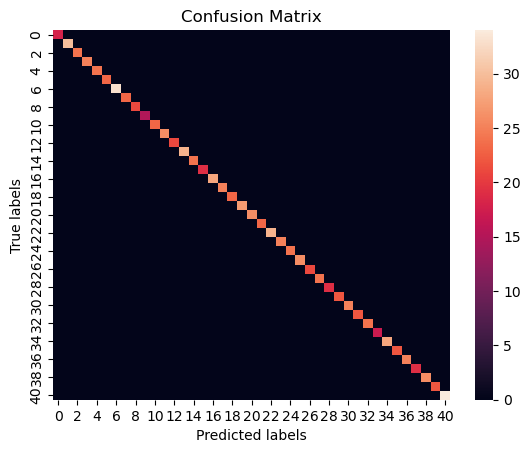

In [73]:
cm_knn = confusion_matrix(y3_test, y_pred_KNN)
sns.heatmap(cm_knn)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
pickle.dump(best_knn_model, open('model3.pkl','wb'))